In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

## Load in the dataset CSV

In [2]:
df = pd.read_csv("../input_data/butterfly_anomaly_train.csv")
df.head()

,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename,classification
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg,8.0 and 9.0
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg,8.0 and 9.0
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg,8.0 and 9.0
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg,8.0
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg,9.0


## Make one column with classification

This is the subspecies (which may is a mix of two for some specimens, the hybrids); this is for coloring the distribution plot by hybrid status and showing all together.

In [3]:
# camid: class activation map id
for camid in list(df.loc[df["subspecies"].isna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["parent_subspecies_1"].astype(str) + " and " + temp["parent_subspecies_2"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies
for camid in list(df.loc[df["subspecies"].notna(), "CAMID"]):
    temp = df.loc[df["CAMID"] == camid]
    subspecies = temp["subspecies"].astype(str)
    df.loc[df["CAMID"] == camid, "classification"] = subspecies

In [4]:
# write the dataframe back to the file
df.to_csv("../input_data/butterfly_anomaly_train.csv", index=False)
df.head()


,CAMID,file_url,hybrid_stat,split,zenodo_link,md5,subspecies,parent_subspecies_1,parent_subspecies_2,filename,classification
0,CAM017821,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,ba38c61337e2d720f5f72451387d4a48,NaN,8.0,9.0,CAM017821.jpg,8.0 and 9.0
1,CAM017820,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,9a2ff257a0ad17055eae3cc6c279a62b,NaN,8.0,9.0,CAM017820.jpg,8.0 and 9.0
2,CAM017693,https://zenodo.org/record/1748277/files/CAM017...,hybrid,train,https://zenodo.org/record/1748277,c314eec15bb53750bdd68595d95a5e93,NaN,8.0,9.0,CAM017693.jpg,8.0 and 9.0
3,CAM018291,https://zenodo.org/record/2548678/files/CAM018...,non-hybrid,train,https://zenodo.org/record/2548678,e3a7bf83bdb9f11c035873a623a31345,8.0,NaN,NaN,CAM018291.jpg,8.0
4,CAM011430,https://zenodo.org/record/2550097/files/CAM011...,non-hybrid,train,https://zenodo.org/record/2550097,5060c653aea379c72802aa3ef8af32b0,9.0,NaN,NaN,CAM011430.jpg,9.0


## Get distribution of images by subspecies (colored by hybrid status)

Count: 856
Count: 201
Count: 77
Count: 98
Count: 48
Count: 23
Count: 8
Count: 83
Count: 2
Count: 21
Count: 16
Count: 489
Count: 2
Count: 67
Count: 91


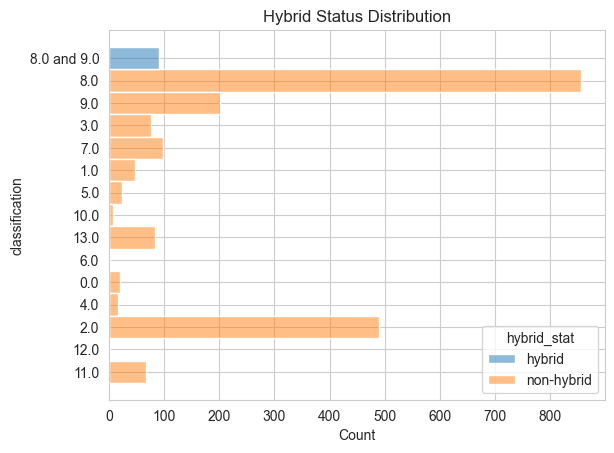

In [5]:
import matplotlib.pyplot as plt
hist = sns.histplot(df, y = "classification", hue = "hybrid_stat", fill = True)

plt.title("Hybrid Status Distribution")
for patch in hist.patches:
    if (patch.get_width() > 0):
        print(f"Count: {patch.get_width()}")

## Loaded data and split into train and test 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Get stratified 15% of the training images for sample run (should take about 12 minutes to download),
# update "test_size" to select more or less sample images.
X_train, X_test = train_test_split(df, test_size = 0.2, stratify = df["classification"], random_state = 1)

print(df.__len__())
print(X_train.info())
print(X_test.info())    
print(X_train.head())

2082
<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 604 to 230
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMID                1665 non-null   object 
 1   file_url             1665 non-null   object 
 2   hybrid_stat          1665 non-null   object 
 3   split                1665 non-null   object 
 4   zenodo_link          1665 non-null   object 
 5   md5                  1665 non-null   object 
 6   subspecies           1592 non-null   float64
 7   parent_subspecies_1  73 non-null     float64
 8   parent_subspecies_2  73 non-null     float64
 9   filename             1665 non-null   object 
 10  classification       1665 non-null   object 
dtypes: float64(3), object(8)
memory usage: 156.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 231 to 1917
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ----

## Import training requirements

In [8]:
import torch
import sys
import os
import csv
from pathlib import Path
# Add your path of library
sys.path.append('My_model')
import training

## Load Training Data

In [9]:
# training.DATA_FILE = Path('./sample_annotation.csv')
training.DATA_FILE = Path('../input_data/butterfly_anomaly_train.csv')
# training.IMG_DIR = Path('./sample_images')
training.IMG_DIR = Path('../input_data/both')
train_data, test_data = training.load_data(training.DATA_FILE, training.IMG_DIR)
print(train_data.head())

Filtering bad urls: 2082it [00:01, 1526.12it/s]

Bad rows: 0
          CAMID                                           file_url  \
2042  CAM036388  https://zenodo.org/record/5561246/files/CAM036...   
1170  CAM016980  https://zenodo.org/record/3082688/files/CAM016...   
1689    19N2248  https://zenodo.org/record/4288311/files/19N224...   
1103  CAM016070  https://zenodo.org/record/3082688/files/CAM016...   
483   CAM040581  https://zenodo.org/record/2707828/files/CAM040...   

     hybrid_stat  split                        zenodo_link  \
2042  non-hybrid  train  https://zenodo.org/record/5561246   
1170      hybrid  train  https://zenodo.org/record/3082688   
1689  non-hybrid  train  https://zenodo.org/record/4288311   
1103  non-hybrid  train  https://zenodo.org/record/3082688   
483   non-hybrid  train  https://zenodo.org/record/2707828   

                                   md5  subspecies  parent_subspecies_1  \
2042  9f54a19e475d73769a774a9af6a563e7        11.0                  NaN   
1170  c771afa86286771cdd7f0273c870da36      

## Model setup


In [10]:
training.DEVICE='cuda' if torch.cuda.is_available() else 'cpu'
model = training.get_detrResnet_model(name='facebook/detr-resnet-50').to(training.DEVICE)
training.BATCH_SIZE = 4

# Location to save checkpoints and results
training.CLF_SAVE_DIR = Path('./trained_clfs')
os.makedirs(training.CLF_SAVE_DIR, exist_ok=True)
print(training.DEVICE)
# print(model)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

c:\Users\Admin-62501\anaconda3\envs\butterfly-detection\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin-62501\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when in

cpu


## Start training

In [11]:
# Create dataloader
train_loader, test_loader = training.prepare_data_loaders(train_data, test_data)
print(train_loader)
print(test_loader)

Created base dataset with 1665 samples
Created base dataset with 417 samples


In [12]:
# Extract visual features from model
try: 
    tr_features, tr_labels, test_features, test_labels = training.extract_features(train_loader, test_loader, model)
    print(tr_features)
except Exception as e:
    print("Error in extracting features")
    print(e)

Extracting features: 100%|██████████| 105/105 [02:38<00:00,  1.51s/it]

[[-15.542916    -0.91045094  -7.36014    ...  -8.97842     -5.407525
    7.603818  ]
 [-14.988806    -0.91125643  -5.5944624  ...  -3.4682074   -0.01910743
    6.888975  ]
 [-15.784734     3.8314717   -6.208378   ... -10.686158    -5.603228
    6.7690516 ]
 ...
 [-15.173181     1.2875555   -3.8539486  ...  -5.5410814   -0.65423435
    7.466252  ]
 [-15.109357    -1.8908516   -3.902047   ...  -7.9937053   -1.7277328
    7.293795  ]
 [-15.825258     0.51061547  -2.476412   ...  -7.306231    -1.2499074
    7.69989   ]]


In [13]:
print(tr_features)

[[-15.542916    -0.91045094  -7.36014    ...  -8.97842     -5.407525
    7.603818  ]
 [-14.988806    -0.91125643  -5.5944624  ...  -3.4682074   -0.01910743
    6.888975  ]
 [-15.784734     3.8314717   -6.208378   ... -10.686158    -5.603228
    6.7690516 ]
 ...
 [-15.173181     1.2875555   -3.8539486  ...  -5.5410814   -0.65423435
    7.466252  ]
 [-15.109357    -1.8908516   -3.902047   ...  -7.9937053   -1.7277328
    7.293795  ]
 [-15.825258     0.51061547  -2.476412   ...  -7.306231    -1.2499074
    7.69989   ]]


In [14]:
# Train classifier with visual features
csv_output, score_output = training.train_and_evaluate(tr_features, tr_labels, test_features, test_labels)

Training and evaluating svm...
Saved svm classifier to trained_clfs\trained_svm_classifier.pkl
svm: Acc - 0.9459, Hacc - 0.7778, NHacc - 0.9556

          Hybrid-Recall: 0.6428571428571429
          Hybrid-Precision: 0.3103448275862069
          f1-Score: 0.4186046511627907
          ROC AUC: 0.7966146756469337
          Accuracy: 0.9400479616306955
          
Training and evaluating sgd...


c:\Users\Admin-62501\anaconda3\envs\butterfly-detection\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Admin-62501\anaconda3\envs\butterfly-detection\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Admin-62501\anaconda3\envs\butterfly-detection\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Admin-62501\anaconda3\envs\butterfly-detection\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

Saved sgd classifier to trained_clfs\trained_sgd_classifier.pkl
sgd: Acc - 0.9520, Hacc - 0.2222, NHacc - 0.9937

          Hybrid-Recall: 0.6428571428571429
          Hybrid-Precision: 0.3103448275862069
          f1-Score: 0.4186046511627907
          ROC AUC: 0.7966146756469337
          Accuracy: 0.9400479616306955
          
Training and evaluating knn...
Saved knn classifier to trained_clfs\trained_knn_classifier.pkl
knn: Acc - 0.9580, Hacc - 0.2222, NHacc - 1.0000

          Hybrid-Recall: 0.7857142857142857
          Hybrid-Precision: 0.3548387096774194
          f1-Score: 0.4888888888888889
          ROC AUC: 0.8680432470755051
          Accuracy: 0.9448441247002398
          


In [15]:
# Save evaluation results
csv_filename = training.CLF_SAVE_DIR / "classifier_evaluation_results.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Configuration", "AUC", "Precision", "Recall", "F1-score"])
    writer.writerows(csv_output)

# Save individual scores
scores_filename = training.CLF_SAVE_DIR / "classifier_scores.csv"
with open(scores_filename, mode='w', newline='') as score_file:
    score_writer = csv.writer(score_file)
    score_writer.writerow(["Index", "Score", "True Label"])
    score_writer.writerows(score_output)